In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [31]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [28]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.0.3d', seconds=5)

> Grabbing 5 seconds of pupil.0.3d
> PupilGrabber done grabbing 5 seconds of pupil.0.3d


In [29]:
data = pgr_future.result()
data[0]

{'id': 0,
 'topic': 'pupil.0.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.10893175404141926, 0.2816239133415722],
 'diameter': 49.09420356968995,
 'confidence': 0.8901541829109192,
 'timestamp': 507613.476453,
 'sphere': {'center': [2.185604480264406,
   0.8276774365298575,
   21.984178400688215],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [124.34884799781179, 106.61677143273349],
  'axes': [328.85772719787764, 328.85772719787764],
  'angle': 0.0},
 'circle_3d': {'center': [-2.7635546910131707,
   1.636126424153039,
   12.88185816177275],
  'normal': [-0.47623306329990234, 0.07779304010505406, -0.8758711733646705],
  'radius': 0.9414674695480485},
 'diameter_3d': 1.882934939096097,
 'ellipse': {'center': [20.9148967759525, 137.92820863841814],
  'axes': [39.52987517889742, 49.09420356968995],
  'angle': 166.34862650982686},
 'location': [20.9148967759525, 137.92820863841814],
 'model_confidence': 1.0,
 'theta': 1.4929246081393999,
 'phi': -2.0688091260

Text(0.5, 0, 'Pupil timestamp (s)')

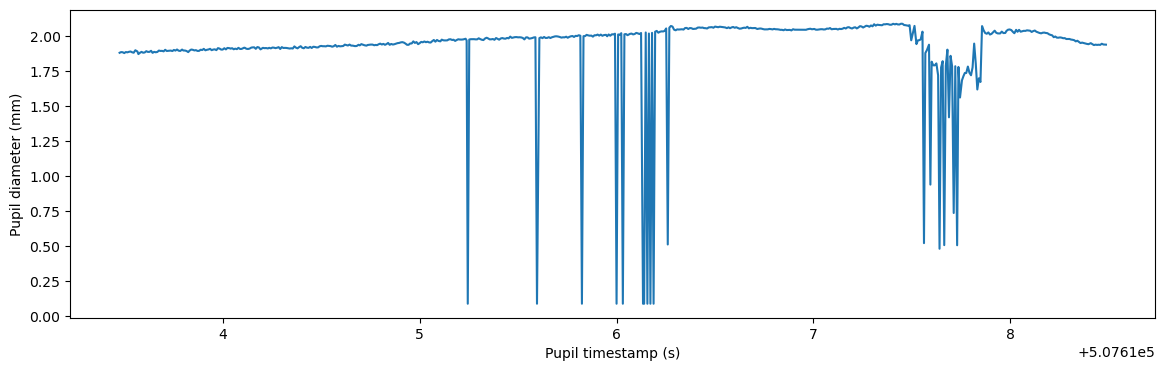

In [30]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')